In [1]:
%matplotlib inline

#Enable reloading because restarting the kernel is a pain
%load_ext autoreload
%autoreload 2

import shapely
from shapely.geometry import Polygon

import matplotlib.pyplot as plt
import numpy as np

from bot_2d_rep import *
from bot_2d_problem import *

import copy

# Set up a simple robot

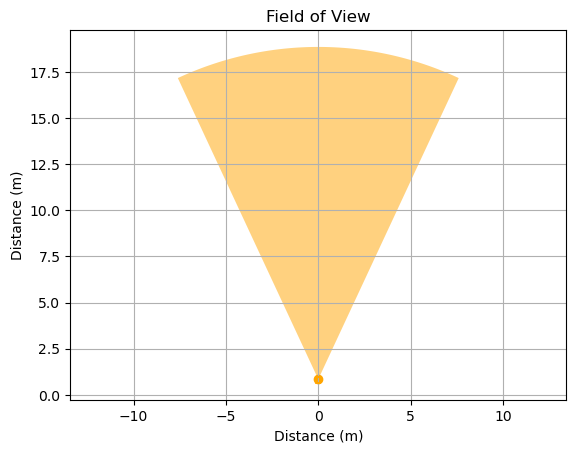

In [2]:
sensor_bounds = Polygon([(.1,.1), (-.1,.1),(-.1,-.2),(.1,-.2)])

sensors = [FOV2D_Simple(hfov=50, distance=18, focal_point=(0,.85), color='orange', cost=99.00, bounds_polygon=copy.deepcopy(sensor_bounds)),
           FOV2D_Simple(hfov=90, distance=10, focal_point=(-.85,.35), cost=80.00, bounds_polygon=copy.deepcopy(sensor_bounds)).rotate(60),
           FOV2D_Simple(hfov=90, distance=10, focal_point=(-.85,-.35), cost=80.00, bounds_polygon=copy.deepcopy(sensor_bounds)).rotate(120),
           FOV2D_Simple(hfov=90, distance=10, focal_point=(.85,.35), cost=80.00, bounds_polygon=copy.deepcopy(sensor_bounds)).rotate(-60),
           FOV2D_Simple(hfov=90, distance=10, focal_point=(.85,-.35), cost=80.00, bounds_polygon=copy.deepcopy(sensor_bounds)).rotate(-120)]
sensors[0].plot_fov(whole_plot=True)


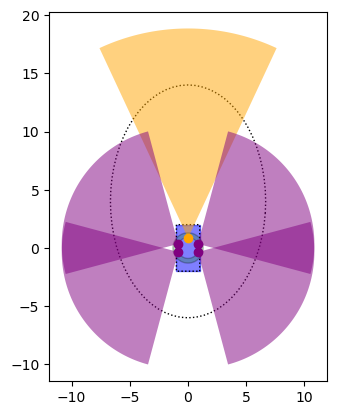

Perception Coverage: 89.88657311952292%
Perception Cost: $419.0


In [3]:
bot_diam = 1
bot_bounds = Polygon([(-1, -2), (-1, 2), (1, 2), (1, -2)])
sens_constraint = Polygon(shapely.geometry.Point(0, 0).buffer(bot_diam+.1).exterior.buffer(0.2))
sense_requirement =  Polygon(shapely.geometry.Point(0, 0).buffer(10).exterior.coords)
sense_requirement = shapely.affinity.scale(sense_requirement, xfact=2/3, yfact=1, origin=(0, 0))
sense_requirement = shapely.affinity.translate(sense_requirement, xoff=0, yoff=4)
bot = SimpleBot2d(bot_bounds, sense_requirement, sensor_pose_constraint=sens_constraint)
bot.add_sensors_2d(sensors)

bot.plot_bot(show_constraint=True)

bot.is_valid_pkg()
print(f"Perception Coverage: {bot.get_sensor_coverage()*100}%")
print(f"Perception Cost: ${bot.get_pkg_cost()}")

## Rotate a sensor to test

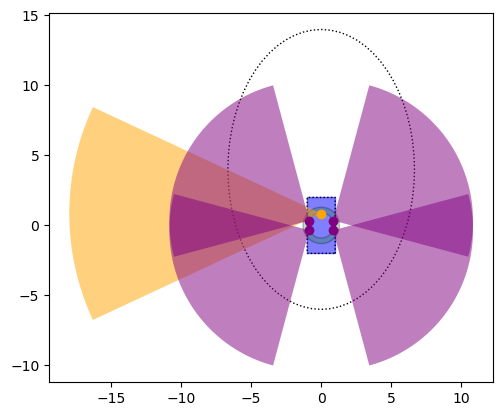

In [4]:
# Rotate the first sensor by 45 degrees
bot.sensors[0].rotate(90)

# Plot the bot with the updated sensor
bot.plot_bot(show_constraint=True)

bot.is_valid_pkg()
bot.get_sensor_coverage()

bot.sensors[0].rotate(-90)

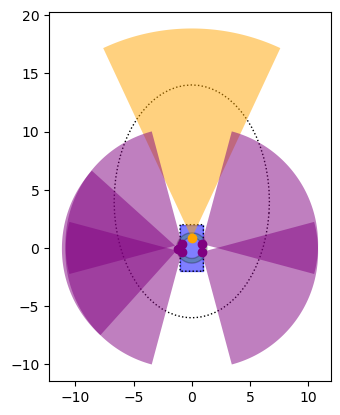

0.8998956111296912

In [5]:
# Add a sensor in a random valid pose
bot.add_sensor_valid_pose(FOV2D_Simple(hfov=90, distance=10, cost=80.00, bounds_polygon=copy.deepcopy(sensor_bounds)))

bot.plot_bot(show_constraint=True)

bot.is_valid_pkg()
bot.get_sensor_coverage()

# Set up & run the simple optimization problem

In [6]:
from pymoo.problems.functional import FunctionalProblem

sensor_options = [FOV2D_Simple(hfov=90, distance=10, cost=80.00, color="purple", bounds_polygon=copy.deepcopy(sensor_bounds)),
                  FOV2D_Simple(hfov=75, distance=9, cost=30.00, color="pink", bounds_polygon=copy.deepcopy(sensor_bounds))]

problem = SensorPkgOptimization(bot, sensor_options, 8)

print(problem.vars)

# F, G = problem.evaluate(np.array([problem.convert_bot_to_1D(bot)]))

# print(f"F: {F}")
# print(f"G: {G}")
# print(f"H: {H}")

{'s0_type': <pymoo.core.variable.Integer object at 0x310d541d0>, 's0_x': <pymoo.core.variable.Real object at 0x312854f90>, 's0_y': <pymoo.core.variable.Real object at 0x310db4e50>, 's0_rotation': <pymoo.core.variable.Real object at 0x3128c8350>, 's1_type': <pymoo.core.variable.Integer object at 0x3128c8150>, 's1_x': <pymoo.core.variable.Real object at 0x3128c8090>, 's1_y': <pymoo.core.variable.Real object at 0x3128c8650>, 's1_rotation': <pymoo.core.variable.Real object at 0x3128cb310>, 's2_type': <pymoo.core.variable.Integer object at 0x3128cb410>, 's2_x': <pymoo.core.variable.Real object at 0x310bdfd50>, 's2_y': <pymoo.core.variable.Real object at 0x31287f490>, 's2_rotation': <pymoo.core.variable.Real object at 0x31287da10>, 's3_type': <pymoo.core.variable.Integer object at 0x31287ebd0>, 's3_x': <pymoo.core.variable.Real object at 0x31287f690>, 's3_y': <pymoo.core.variable.Real object at 0x31287cc90>, 's3_rotation': <pymoo.core.variable.Real object at 0x31287c7d0>, 's4_type': <pymoo.c

n_gen  |  n_eval  |     f_avg     |     f_min    
     1 |      200 |           INF |           INF
     2 |      275 |           INF |           INF
     3 |      350 |           INF |           INF
     4 |      425 |           INF |           INF


/Users/robosquiggles/miniforge3/envs/blenv/lib/python3.11/site-packages/pymoo/operators/survival/rank_and_crowding/metrics.py:97: RuntimeWarning: invalid value encountered in subtract
  dist = np.row_stack([F, np.full(n_obj, np.inf)]) - np.row_stack([np.full(n_obj, -np.inf), F])
/Users/robosquiggles/miniforge3/envs/blenv/lib/python3.11/site-packages/pymoo/operators/survival/rank_and_crowding/metrics.py:100: RuntimeWarning: invalid value encountered in subtract
  norm = np.max(F, axis=0) - np.min(F, axis=0)


     5 |      500 |           INF |           INF
     6 |      575 |           INF |           INF
     7 |      650 |           INF |           INF
     8 |      725 |           INF |           INF
     9 |      800 |           INF |           INF
    10 |      875 |           INF |           INF
    11 |      950 |           INF |           INF
    12 |     1025 |           INF |           INF
    13 |     1100 |           INF |           INF
    14 |     1175 |           INF |           INF
    15 |     1250 |           INF |           INF
    16 |     1325 |           INF |           INF
    17 |     1400 |           INF |           INF
    18 |     1475 |           INF |           INF
    19 |     1550 |           INF |           INF
    20 |     1625 |           INF |           INF
    21 |     1700 |           INF |           INF
    22 |     1775 |           INF |           INF
    23 |     1850 |           INF |           INF
    24 |     1925 |           INF |           INF


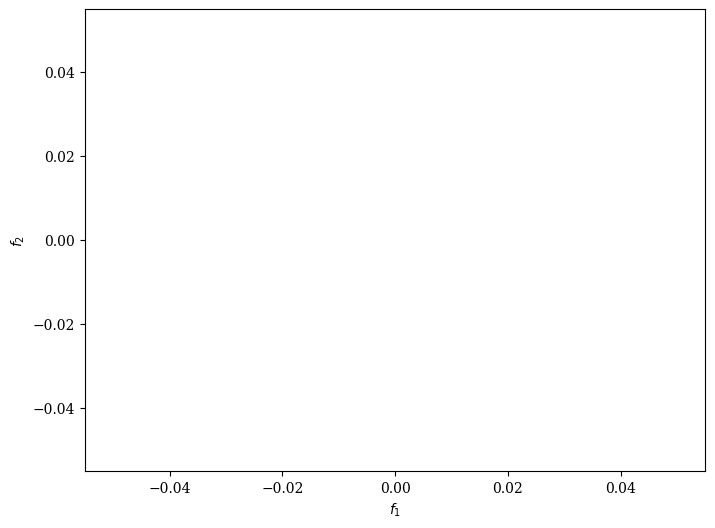

In [7]:
from pymoo.algorithms.moo.nsga2 import NSGA2, RankAndCrowdingSurvival
from pymoo.core.mixed import MixedVariableGA
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.operators.crossover.sbx import SBX
from pymoo.operators.mutation.pm import PM
from pymoo.operators.sampling.rnd import FloatRandomSampling


algorithm = MixedVariableGA(
    pop_size=200,
    n_offsprings=75,
    sampling=CustomSensorPkgRandomSampling(),
    crossover=MixedVariableMating(),
    survival=RankAndCrowdingSurvival(),
    eliminate_duplicates=False
)

res = minimize(problem,
               algorithm,
               ('n_gen', 500),
               seed=1,
               verbose=True)

pareto_front = problem.pareto_front(use_cache=False, flatten=False)
plot = Scatter()
plot.add(pareto_front, plot_type="line", color="black", alpha=0.7)
plot.add(res.F, facecolor="none", edgecolor="red")
plot.show()

In [8]:
import pandas as pd

import plotly.express as px

results = res.F

# Create a DataFrame from the results
df_results = pd.DataFrame(results, columns=['Perception Coverage', 'Cost'])
df_results['Perception Coverage'] = (1- df_results['Perception Coverage']) * 100
df_results['Index'] = df_results.index

# Create the scatter plot
fig = px.scatter(df_results, x='Cost', y='Perception Coverage', hover_data=['Index'], title=f"Objective Space (generated {results.shape[0]} concepts)", template="plotly_white")

# Show the plot
fig.show()
df_results


,Perception Coverage,Cost,Index
0,-inf,inf,0
1,-inf,inf,1
2,-inf,inf,2
3,-inf,inf,3
4,-inf,inf,4
...,...,...,...
195,-inf,inf,195
196,-inf,inf,196
197,-inf,inf,197
198,-inf,inf,198
